In [1]:
print("Nguyễn Nguyên Huy - 6351071030")

Nguyễn Nguyên Huy - 6351071030


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/Data Mining/Dataset/heart.csv"
heart_df = pd.read_csv(path, sep= ',')
print("Số lượng dữ liệu huấn luyện:", len(heart_df))
print(heart_df.head())

print(f"\nMissing values: {heart_df.isna().sum().sum()} (tổng)")
if heart_df.isna().sum().sum() == 0:
    print("→ Dữ liệu sạch, không có giá trị trống!")

print("\nPhân bố cột 'target':")
print(heart_df['target'].value_counts())
print(f"→ Lớp 1 (bệnh tim): {heart_df['target'].mean()*100:.1f}%")
print(f"→ Lớp 0 (khỏe): {(1 - heart_df['target'].mean())*100:.1f}%")

Số lượng dữ liệu huấn luyện: 303
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Missing values: 0 (tổng)
→ Dữ liệu sạch, không có giá trị trống!

Phân bố cột 'target':
target
1    165
0    138
Name: count, dtype: int64
→ Lớp 1 (bệnh tim): 54.5%
→ Lớp 0 (khỏe): 45.5%


In [5]:
new_column_names = {
    'age': 'age', 'sex': 'sex', 'cp': 'chest_pain_type', 'trestbps': 'resting_blood_pressure',
    'chol': 'cholesterol', 'fbs': 'fasting_blood_sugar', 'restecg': 'rest_ecg',
    'thalach': 'max_heart_rate_achieved', 'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression', 'slope': 'st_slope', 'ca': 'num_major_vessels',
    'thal': 'thalassemia', 'target': 'target'
}
heart_df = heart_df.rename(columns=new_column_names)

print(f"Đã tải dữ liệu: {heart_df.shape[0]} mẫu, {heart_df.shape[1]} cột")

Đã tải dữ liệu: 303 mẫu, 14 cột


In [6]:
# Xóa dòng trống
heart_df = heart_df.dropna()

# Tách X, y
X = heart_df.drop('target', axis=1)
y = heart_df['target']

# One-hot encoding các cột categorical
cat_cols = ['chest_pain_type', 'rest_ecg', 'st_slope', 'thalassemia']
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

X_train: (212, 19), X_test: (91, 19)


In [8]:
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_model.fit(X_train, y_train)

print(f"ID3 huấn luyện xong! Độ sâu: {id3_model.get_depth()}")

ID3 huấn luyện xong! Độ sâu: 8


In [14]:
'''
Yêu cầu: Huấn luyện mô hình và đánh giá mô hình bằng các thông số. Giải thích thêm
thông số F1-score
'''

y_pred = id3_model.predict(X_test)

# Tính các chỉ số
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')  # F-measure

print(f"\nKẾT QUẢ ĐÁNH GIÁ MÔ HÌNH ID3:")
print(f"→ Accuracy       : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"→ Precision      : {precision:.4f}")
print(f"→ Recall         : {recall:.4f}")
print(f"→ F-measure (F1) : {f1:.4f}  ← Trung bình điều hòa của Precision & Recall")


KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH ID3:
→ Accuracy       : 0.7802 (78.02%)
→ Precision      : 0.7798
→ Recall         : 0.7802
→ F-measure (F1) : 0.7796  ← Trung bình điều hòa của Precision & Recall



BÁO CÁO PHÂN LOẠI CHI TIẾT:
              precision    recall  f1-score   support

        Khỏe       0.77      0.73      0.75        41
    Bệnh tim       0.79      0.82      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



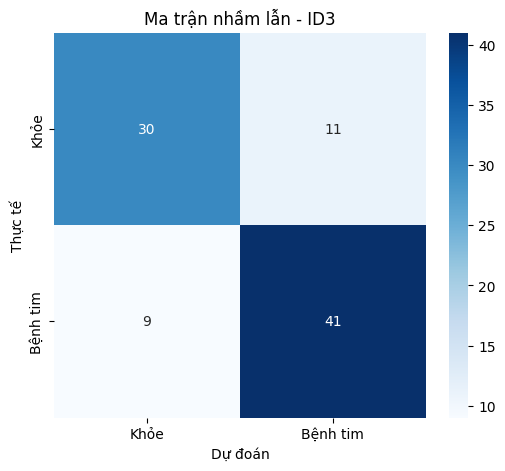

In [10]:
print("\nBÁO CÁO PHÂN LOẠI CHI TIẾT:")
print(classification_report(y_test, y_pred, target_names=['Khỏe', 'Bệnh tim'], zero_division=0))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Khỏe', 'Bệnh tim'], yticklabels=['Khỏe', 'Bệnh tim'])
plt.title('Ma trận nhầm lẫn - ID3')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

In [12]:

print("GIẢI THÍCH F-MEASURE (TRUNG BÌNH ĐIỀU HÒA)")

print("F1 = 2 × (Precision × Recall) / (Precision + Recall)")
print(f"   = 2 × ({precision:.4f} × {recall:.4f}) / ({precision:.4f} + {recall:.4f})")

print("→ F-measure cân bằng giữa độ chính xác và độ phủ")
print("→ Rất hữu ích khi lớp không cân bằng hoặc cần đánh giá tổng thể")


GIẢI THÍCH F-MEASURE (TRUNG BÌNH ĐIỀU HÒA)
F1 = 2 × (Precision × Recall) / (Precision + Recall)
   = 2 × (0.7798 × 0.7802) / (0.7798 + 0.7802)
→ F-measure cân bằng giữa độ chính xác và độ phủ
→ Rất hữu ích khi lớp không cân bằng hoặc cần đánh giá tổng thể
